In [1]:
import numpy as np
import math 
import cmath
import abipy
from abipy.electrons.scr import ScrFile
import time
import matplotlib.pyplot as plt
import pointcloud as pc
from scipy.interpolate import RegularGridInterpolator
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2
import Fourier_tool as Ft
import XGChi0 
import MatrixCharacteristic

# Structure Part

### Slab classic :

filename : Al_Slab_nsym0o_DS1_SUS.nc (nsym0), Al_Slab_nsym1o_DS1_SUS.nc (nsym1)

nat_cellslab=4

Aslab=[2.017790474253013, -2.017790474253013, 0.0]

Bslab=[2.017790474253013, 2.017790474253013, 0.0]

Cslab=[0.0, 0.0, 14.124533319771093]

pos_redslab=np.array([[0.0000, 0.0000, -0.0060],
[-0.5000, 0.5000, 0.1369],
[0.0000, 0.0000, 0.2798],
[-0.5000, 0.5000, 0.4226]])

nkslab=[4,4,1]

XGChi0.Vis_tool(chi0rrslab, Rslab, Aslab, Bslab, Cslab, nkslab, nat_cellslab, pos_redslab, N=10000, isomin=3)

## Slab double void

filename : Al_Slab_dvo_DS1_SUS.nc

Aslab2 = [2.017790474253013, -2.017790474253013, 0.0]

Bslab2 = [2.017790474253013, 2.017790474253013, 0.0]

Cslab2 = [0.0, 0.0, 28.249066639542185]

pos_red_slab2 = np.array([[0.0000, -0.0000, -0.0071], [-0.5000, 0.5000, 0.0643], [0.0000, -0.0000, 0.1357], [-0.5000, 0.5000, 0.2071])

nkslab2 = [4, 4, 1]

nat_cellslab2 = 4

XGChi0.Vis_tool(chi0rrslab2, Rslab2, Aslab2, Bslab2, Cslab2, nkslab2, nat_cellslab2, pos_red_slab2, N=10000, isomin=3)

## Bulk Prim

filename : Al_Bulk_nsym0o_DS1_SUS.nc (nsym0), Al_Bulk_nsym1o_DS1_SUS.nc (nsym1), Al_Bulk_eps17_SUS.nc (nsym0)

A = [1.6475190232561199, 0.0, 2.3299437469564794]

B = [-0.8237595116280599, 1.426793327357925, 2.3299437469564794]

C = [-0.8237595116280599, -1.426793327357925, 2.3299437469564794]

pos_red = np.array([[0, 0, 0]])

nat_cell = 1

nk = [4, 4, 4]

XGChi0.Vis_tool(chi0rr, R, A, B, C, nk, nat_cell, pos_red, N=10000, isomin=3)

## Bulk Prim nkpt 6 6 6 

filename : Al_Bulk_nkpt6o_DS1_SUS.nc (nsym0)

A = [1.6475190232561199, 0.0, 2.3299437469564794]

B = [-0.8237595116280599, 1.426793327357925, 2.3299437469564794]

C = [-0.8237595116280599, -1.426793327357925, 2.3299437469564794]

pos_red = np.array([[0, 0, 0]])

nat_cell = 1

nk = [6, 6, 6]

XGChi0.Vis_tool(chi0rr, R, A, B, C, nk, nat_cell, pos_red, N=10000, isomin=3)

## Bulk Conv

filename : Al_Bulko_DS1_SUS.nc

D = [4.0389300176539065, 0.0, 0.0]

E = [2.4731313590500095e-16, 4.0389300176539065, 0.0]

F = [2.4731313590500095e-16, 2.4731313590500095e-16, 4.0389300176539065]

posred_conv = np.array([[0, 0, 0], [0, 0.5, 0.5], [0.5, 0, 0.5], [0.5, 0.5, 0]])

nat_cell_conv = 4

nkconv = [4, 4, 4]

XGChi0.Vis_tool(chi0rrconv, Rconv, D, E, F, nkconv, nat_cell_conv, posred_conv, N=10000, isomin=3)

# Test Algorithm Part

In [93]:
chi0rr = XGChi0.FFT_chi0("Al_Bulk_nsym0o_DS1_SUS.nc", "FromSym", "Kaltak")

{(0.0, 0.0, 0.0): 0, (1.0, 0.0, 0.0): 1, (-1.0, 0.0, 0.0): 2, (0.0, 0.0, 1.0): 3, (0.0, 0.0, -1.0): 4, (-1.0, -1.0, -1.0): 5, (1.0, 1.0, 1.0): 6, (0.0, 1.0, 0.0): 7, (0.0, -1.0, 0.0): 8, (1.0, 1.0, 0.0): 9, (-1.0, -1.0, 0.0): 10, (-1.0, 0.0, -1.0): 11, (1.0, 0.0, 1.0): 12, (0.0, 1.0, 1.0): 13, (0.0, -1.0, -1.0): 14, (-1.0, 1.0, 0.0): 15, (1.0, -1.0, 0.0): 16, (-1.0, -1.0, -2.0): 17, (1.0, 1.0, 2.0): 18, (1.0, 2.0, 1.0): 19, (-1.0, -2.0, -1.0): 20, (-1.0, 0.0, 1.0): 21, (1.0, 0.0, -1.0): 22, (0.0, 1.0, -1.0): 23, (0.0, -1.0, 1.0): 24, (-2.0, -1.0, -1.0): 25, (2.0, 1.0, 1.0): 26, (0.25, 0.0, 0.0): 27, (1.25, 0.0, 0.0): 28, (-0.75, 0.0, 0.0): 29, (0.25, 0.0, 1.0): 30, (0.25, 0.0, -1.0): 31, (-0.75, -1.0, -1.0): 32, (1.25, 1.0, 1.0): 33, (0.25, 1.0, 0.0): 34, (0.25, -1.0, 0.0): 35, (1.25, 1.0, 0.0): 36, (-0.75, -1.0, 0.0): 37, (-0.75, 0.0, -1.0): 38, (1.25, 0.0, 1.0): 39, (0.25, 1.0, 1.0): 40, (0.25, -1.0, -1.0): 41, (-0.75, 1.0, 0.0): 42, (1.25, -1.0, 0.0): 43, (-0.75, -1.0, -2.0): 44, (1

In [110]:
chi0rrnsym1 = XGChi0.FFT_chi0("Al_Bulk_nkpt6o_DS1_SUS.nc", "FromSym", "Kaltak")

5832
432
4092
3509
[[[-3.75247353e-08-6.65457907e-29j -3.26093271e-07-1.17365495e-13j
    3.26093271e-07-1.04596087e-13j ... -5.78902473e-08+1.10176227e-14j
    5.78902508e-08-1.63855847e-14j -5.78903254e-08-6.53156465e-15j]
  [-3.26093271e-07+1.17365495e-13j -7.58652464e-02+4.81771059e-16j
    1.91313028e-03-2.98867311e-12j ...  1.96357444e-03-6.58360736e-12j
   -3.45333363e-04-1.79325565e-11j -1.31515227e-03+5.11867241e-12j]
  [ 3.26093271e-07+1.04596087e-13j  1.91313063e-03+2.99069233e-12j
   -7.58652538e-02-1.21623142e-15j ...  1.96357444e-03-2.34736588e-11j
   -1.31515227e-03+1.29698309e-11j -3.45333130e-04-2.09349187e-11j]
  ...
  [-5.78902473e-08-1.10176227e-14j  1.96357421e-03+6.58494613e-12j
    1.96357467e-03+2.34726197e-11j ... -2.50102356e-02-3.35775428e-16j
    5.04301046e-04+1.22774772e-12j  5.04301221e-04+2.48226830e-12j]
  [ 5.78902508e-08+1.63855847e-14j -3.45333217e-04+1.79331047e-11j
   -1.31515204e-03-1.29695352e-11j ...  5.04300988e-04-1.22729322e-12j
   -2.5010233

In [ ]:
## Bulk Prim nkpt 6 6 6 

#filename : Al_Bulk_nkpt6o_DS1_SUS.nc (nsym0)

A = [1.6475190232561199, 0.0, 2.3299437469564794]

B = [-0.8237595116280599, 1.426793327357925, 2.3299437469564794]

C = [-0.8237595116280599, -1.426793327357925, 2.3299437469564794]

pos_red = np.array([[0, 0, 0]])

nat_cell = 1

R = [0, 0, 0]

nk = [6, 6, 6]

XGChi0.Vis_tool(chi0rrnsym1, R, A, B, C, nk, nat_cell, pos_red, N=10000, isomin=3)



In [59]:
print(chi0rrnsym1)

[[[[[[-3.17744207e+01+1.22171322e-09j -2.00084871e+01-1.06585005e-04j
      -3.30934450e+00-2.92471014e-04j ...
       1.68975093e+00-4.32574950e-04j -3.30934816e+00+2.92476972e-04j
      -2.00084936e+01+1.06597777e-04j]
     [-2.00084997e+01+1.30588816e-04j -7.27715250e+00+2.01452211e-05j
       1.87254828e-01+3.82089449e-04j ...
       5.37585846e-01+1.99713550e-04j -7.17493066e+00+2.97253363e-04j
      -2.00425668e+01-3.59111987e-04j]
     [-3.30936488e+00+3.22406741e-04j  1.87244900e-01-3.30779075e-04j
       6.64201731e-01+2.36772587e-05j ...
       4.88505956e-01-6.58651330e-05j -3.52804037e+00-1.21756140e-04j
      -7.17493788e+00+3.00194428e-04j]
     ...
     [ 1.68974626e+00+3.87084557e-04j  5.37592767e-01-2.16761605e-04j
       4.88518256e-01+7.86032594e-05j ...
       4.38624370e-02+1.37655704e-05j  3.86658783e-01-1.11996562e-04j
       6.92736283e-01+8.61340419e-05j]
     [-3.30936588e+00-3.22301824e-04j -7.17493689e+00-3.00141913e-04j
      -3.52803774e+00+1.21750874e-04j

In [61]:
print(chi0rrnsym1)

[[[[[[-3.17744207e+01+1.22171322e-09j -2.00084871e+01-1.06585005e-04j
      -3.30934450e+00-2.92471014e-04j ...
       1.68975093e+00-4.32574950e-04j -3.30934816e+00+2.92476972e-04j
      -2.00084936e+01+1.06597777e-04j]
     [-2.00084997e+01+1.30588816e-04j -7.27715250e+00+2.01452211e-05j
       1.87254828e-01+3.82089449e-04j ...
       5.37585846e-01+1.99713550e-04j -7.17493066e+00+2.97253363e-04j
      -2.00425668e+01-3.59111987e-04j]
     [-3.30936488e+00+3.22406741e-04j  1.87244900e-01-3.30779075e-04j
       6.64201731e-01+2.36772587e-05j ...
       4.88505956e-01-6.58651330e-05j -3.52804037e+00-1.21756140e-04j
      -7.17493788e+00+3.00194428e-04j]
     ...
     [ 1.68974626e+00+3.87084557e-04j  5.37592767e-01-2.16761605e-04j
       4.88518256e-01+7.86032594e-05j ...
       4.38624370e-02+1.37655704e-05j  3.86658783e-01-1.11996562e-04j
       6.92736283e-01+8.61340419e-05j]
     [-3.30936588e+00-3.22301824e-04j -7.17493689e+00-3.00141913e-04j
      -3.52803774e+00+1.21750874e-04j

In [41]:
chi0rreps17 = XGChi0.FFT_chi0("Al_Bulk_eps17_SUS.nc", "FromSym", "Standard")

Starting first FFT
(35937, 8375)
Starting second FFT


In [47]:
chi0rr6kpt = XGChi0.FFT_chi0("Al_Bulk_nkpt6o_DS1_SUS.nc", "FromSym", "Standard")

Starting first FFT
(15625, 125)
Starting second FFT


# Saving part 

In [57]:
XGChi0.MatCharac(chi0rr, "chi0slabDV", "Al_Slab_dvo_DS1_SUS.nc", opt1 = "FullBZ", opt2 = "Standard")

In [58]:
np.save('chi0rrslabDV', chi0rr, allow_pickle=True)

# Visualisation Part 

In [35]:
R = [4, 4, 4]

In [36]:
A = [1.6475190232561199, 0.0, 2.3299437469564794]

B = [-0.8237595116280599, 1.426793327357925, 2.3299437469564794]

C = [-0.8237595116280599, -1.426793327357925, 2.3299437469564794]

pos_red = np.array([[0, 0, 0]])

nat_cell = 1

nk = [4, 4, 4]

In [49]:
XGChi0.Vis_tool(chi0rr, R, A, B, C, nk, nat_cell, pos_red, N=1000, isomin=2)

In [40]:
XGChi0.Vis_tool(chi0rr, R, A, B, C, nk, nat_cell, pos_red, N=1000, isomin=2)

In [43]:
XGChi0.Vis_tool(chi0rreps17, R, A, B, C, nk, nat_cell, pos_red, N=1000, isomin=3)

In [48]:
XGChi0.Vis_tool(chi0rr6kpt, R, A, B, C, nk, nat_cell, pos_red, N=1000, isomin=3)

In [18]:
X = np.linspace(0, 19, 19, endpoint=False)

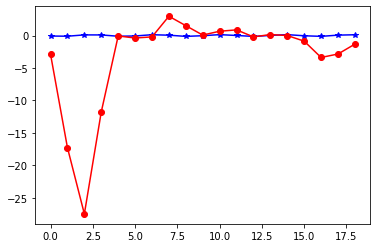

In [19]:
Rfig = [1,1,1]
plt.plot(X, chi0rr[Rfig[0], Rfig[1], Rfig[2], 0, 0, :], 'b-*')
plt.plot(X, chi0rrK[Rfig[0], Rfig[1], Rfig[2], 0, 0, :], 'r-o')


# Test Import Part

In [46]:
##Open the file
sus_ncfile = ScrFile("Al_Bulk_nkpt6o_DS1_SUS.nc")
nw=sus_ncfile.reader.nw
ng=sus_ncfile.reader.ng 
kpoints=sus_ncfile.reader.kpoints
print(kpoints)
chi0=sus_ncfile.reader.read_wggmat(kpoints[0])
G=chi0.gsphere.gvecs
nkpt=len(kpoints)
print("chi0 nsym0 = ",chi0.wggmat[0])
print(chi0.wggmat[0].shape)
print(chi0.wggmat[0,0,0])

0) [+0.000, +0.000, +0.000], weight: 0.000
1) [+0.167, +0.000, +0.000], weight: 0.000
2) [+0.333, +0.000, +0.000], weight: 0.000
3) [+0.500, +0.000, +0.000], weight: 0.000
4) [+0.167, +0.167, +0.000], weight: 0.000
5) [+0.333, +0.167, +0.000], weight: 0.000
6) [+0.500, +0.167, +0.000], weight: 0.000
7) [-0.333, +0.167, +0.000], weight: 0.000
8) [-0.167, +0.167, +0.000], weight: 0.000
9) [+0.333, +0.333, +0.000], weight: 0.000
10) [+0.500, +0.333, +0.000], weight: 0.000
11) [-0.333, +0.333, +0.000], weight: 0.000
12) [+0.500, +0.500, +0.000], weight: 0.000
13) [+0.500, +0.333, +0.167], weight: 0.000
14) [-0.333, +0.333, +0.167], weight: 0.000
15) [-0.333, +0.500, +0.167], weight: 0.000
chi0 nsym0 =  [[-3.75247353e-08-6.65457907e-29j -3.26093271e-07-1.17365495e-13j
   3.26093271e-07-1.04596087e-13j  1.71457441e-06+4.70346587e-14j
  -2.41984878e-07+5.53852144e-14j -9.78280013e-07+6.22283326e-14j
   9.78279445e-07+7.25292425e-14j -4.10201210e-07+2.02427237e-15j
  -1.06238781e-06-2.24128052